In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [177]:
signal_l = 2
rate = 10000


n_samples = signal_l * rate
if n_samples%2 == 0:
    ft_length = int(n_samples/2+1)
else:
    ft_length = int((n_samples+1)/2)


###  Generate the signal

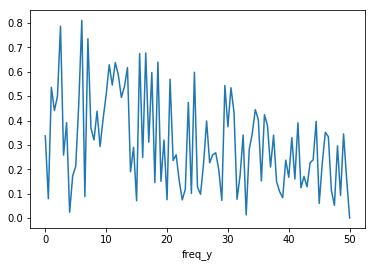

In [178]:
fft_amp = np.random.rand(ft_length)*np.exp(-np.arange(ft_length)*0.01)
fft_phase = np.random.rand(ft_length)*2*np.pi
fft_signal = fft_amp*np.exp(1j*fft_phase)
signal = np.fft.irfft(fft_signal)

n_bins = 500
cutoff_freq = 50

# get a fourier transform of that
n = signal.size
fft = np.fft.rfft(signal)
freq = np.fft.rfftfreq(n, 1/rate)

# create DF out of fft data
signal_fft = pd.DataFrame()
signal_fft['fft_real'] = np.real(fft)
signal_fft['fft_imag'] = np.imag(fft)
signal_fft['amplitude'] = np.abs(fft)
signal_fft['phase'] = np.angle(fft)
signal_fft['freq'] = freq

# bin the data
bins = np.arange(0, cutoff_freq, cutoff_freq/n_bins)
bins = np.append(bins, np.inf)
signal_fft['bins'] = pd.cut(signal_fft['freq'], bins=bins, include_lowest=True)

signal_fft_means = signal_fft.groupby('bins').mean().reset_index()
signal_fft_means = signal_fft_means.dropna()
signal_fft_means.iloc[-1, signal_fft_means.columns.get_loc('freq')] = 50
# print(signal_fft_means.iloc[-2:])
# signal_fft_means.dropna().set_index('freq').loc[:, 'amplitude'].plot()
signal_fft_means['amplitude'] = np.abs(signal_fft_means['fft_real']+1j*signal_fft_means['fft_imag'])
signal_fft_means['phase'] = np.angle(signal_fft_means['fft_real']+1j*signal_fft_means['fft_imag'])
signal_fft_means.iloc[-1, signal_fft_means.columns.get_loc('amplitude')] = np.random.rand()/9500


signal_fft_merged = pd.merge(signal_fft, signal_fft_means, how='left', on='bins')
signal_fft_merged.dropna().set_index('freq_y').loc[:, 'amplitude_y'].plot()

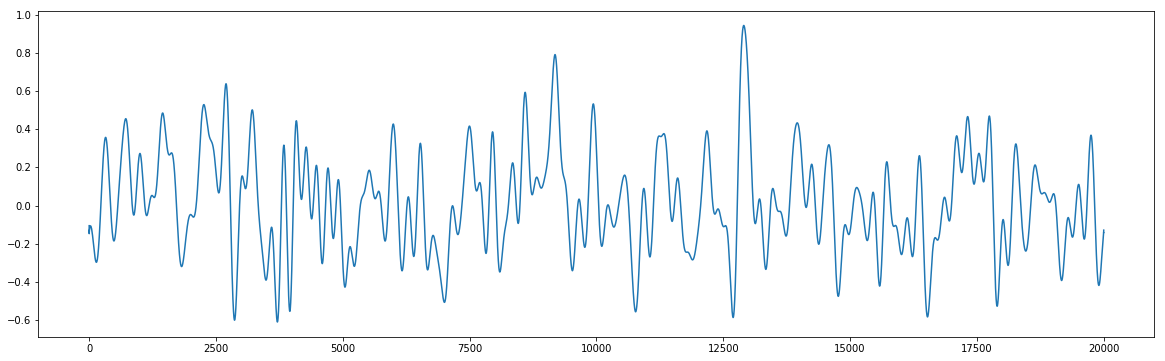

In [179]:
# fft_real = np.array(signal_fft_merged['fft_real_y'].fillna(0))
# fft_imag = np.array(signal_fft_merged['fft_imag_y'].fillna(0))

# fft_filtered = fft_real + np.array([1j])*fft_imag

fft_amp = np.array(signal_fft_merged['amplitude_y'].fillna(0))
fft_phase = np.array(signal_fft_merged['phase_y'].fillna(0))

fft_filtered = fft_amp*np.exp(1j*fft_phase)

signal_filtered = np.fft.irfft(fft_filtered)
signal_filtered /= np.max(signal_filtered)
signal_filtered *= np.random.beta(1, 2)*10
plt.figure(figsize=(20, 6))
plt.plot(signal_filtered, label='filtered')

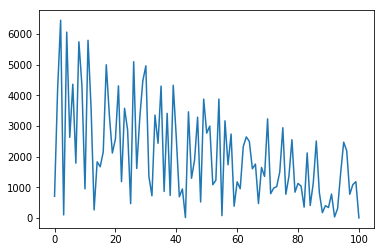

In [145]:
plt.plot(np.abs(np.fft.rfft(signal_filtered))[:101])

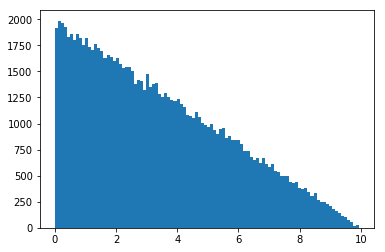

In [5]:
a = 1
b = 2*a
x = np.random.beta(1, 2, 100000)*10
p = plt.hist(x, bins = 100)

In [194]:
def get_random_signal(t, freq_resolution, cutoff_freq):
    rate = int(1/(t[1]-t[0]))
    signal_l = t[-1]-t[0]
    n_samples =  t.size
    
    if n_samples%2 == 0:
        ft_length = int(n_samples/2+1)
    else:
        ft_length = int((n_samples+1)/2)
    print(n_samples)
    fft_amp = np.random.rand(ft_length)*np.exp(-np.arange(ft_length)*0.01)
    fft_phase = np.random.rand(ft_length)*2*np.pi
    fft_signal = fft_amp*np.exp(1j*fft_phase)
    signal = np.fft.irfft(fft_signal)
    

    # get a fourier transform of that
    n = signal.size
    fft = np.fft.rfft(signal)
    freq = np.fft.rfftfreq(n, 1/rate)

    # create DF out of fft data
    signal_fft = pd.DataFrame()
    signal_fft['fft_real'] = np.real(fft)
    signal_fft['fft_imag'] = np.imag(fft)
    signal_fft['amplitude'] = np.abs(fft)
    signal_fft['phase'] = np.angle(fft)
    signal_fft['freq'] = freq

    # bin the data
    bins = np.arange(0, cutoff_freq, cutoff_freq/n_bins)
    bins = np.append(bins, np.inf)
    signal_fft['bins'] = pd.cut(signal_fft['freq'], bins=bins, include_lowest=True)

    signal_fft_means = signal_fft.groupby('bins').mean().reset_index()
    signal_fft_means = signal_fft_means.dropna()
    signal_fft_means.iloc[-1, signal_fft_means.columns.get_loc('freq')] = signal_fft_means['freq'].iloc[-1]+freq_resolution
    signal_fft_means['amplitude'] = np.abs(signal_fft_means['fft_real']+1j*signal_fft_means['fft_imag'])
    signal_fft_means['phase'] = np.angle(signal_fft_means['fft_real']+1j*signal_fft_means['fft_imag'])
    signal_fft_means.iloc[-1, signal_fft_means.columns.get_loc('amplitude')] = np.random.rand()/9500


    signal_fft_merged = pd.merge(signal_fft, signal_fft_means, how='left', on='bins')
    
    fft_amp = np.array(signal_fft_merged['amplitude_y'].fillna(0))
    fft_phase = np.array(signal_fft_merged['phase_y'].fillna(0))

    fft_filtered = fft_amp*np.exp(1j*fft_phase)

    signal_filtered = np.fft.irfft(fft_filtered)
    signal_filtered /= np.max(signal_filtered)
    signal_filtered *= np.random.beta(1, 2)*10
    
    
    return signal_filtered

In [200]:
signal_l = 3
rate = 10000
cutoff_freq = 100
freq_resolution = 0.1
n_loops = 5
skip_loops = 5

30000


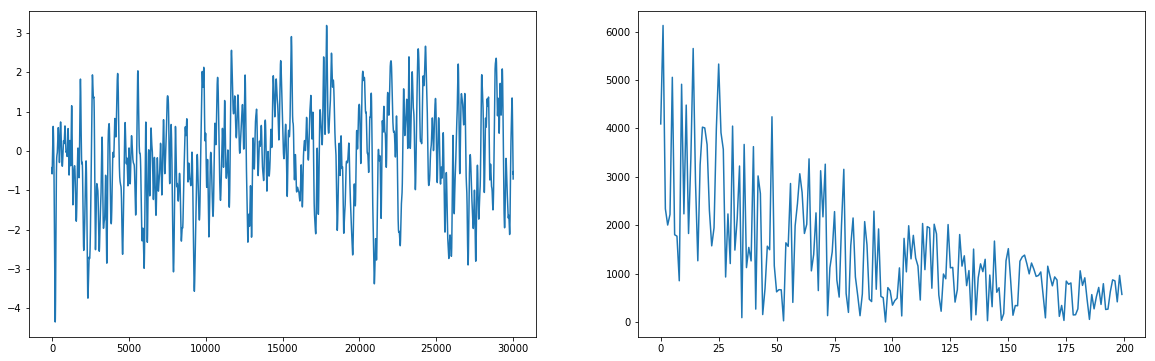

In [201]:
# plt.figure()
t = np.linspace(0, signal_l, rate*signal_l)
signal = get_random_signal(t, freq_resolution, cutoff_freq)
# print(signal)
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(signal)
plt.subplot(122)
plt.plot(np.abs(np.fft.rfft(signal))[:200])

In [ ]:
pl